In [1]:
import os
import sys
import random
import numpy as np
import skimage.io
import matplotlib

ROOT_DIR = os.path.abspath("./")
sys.path.append(ROOT_DIR)

from mrcnn import visualize
import mrcnn.model as modellib
import forest_detect

%matplotlib inline 

Using TensorFlow backend.


In [2]:
class InferenceConfig(forest_detect.DetectConfig):
    NAME = "forest"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 13
    
config = InferenceConfig()

class_names     = ['BG'
                  , 'tree', 'person', 'person_ab', 'people'
                  , 'forest', 'road', 'hiking_trail'
                  , 'rock', 'rocks', 'lawn', 'restarea'
                  , 'parking_lot', 'car'
                  ]

In [3]:
MODEL_PATH = os.path.join(ROOT_DIR, "pre_trained_c13.h5")
testset = ROOT_DIR + "/datasets"
subset= "test"

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_PATH, config=config)
model.load_weights(MODEL_PATH, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.







In [5]:
IMAGE_DIR = os.path.join(testset, subset)
file_names = next(os.walk(IMAGE_DIR))[2]
test_image =  random.choice(file_names)
print("test_image name : ", test_image)

test_image name :  GW070m55d_1102_01_00018000.jpg


Processing 1 images
image                    shape: (2160, 3840, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 3840.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


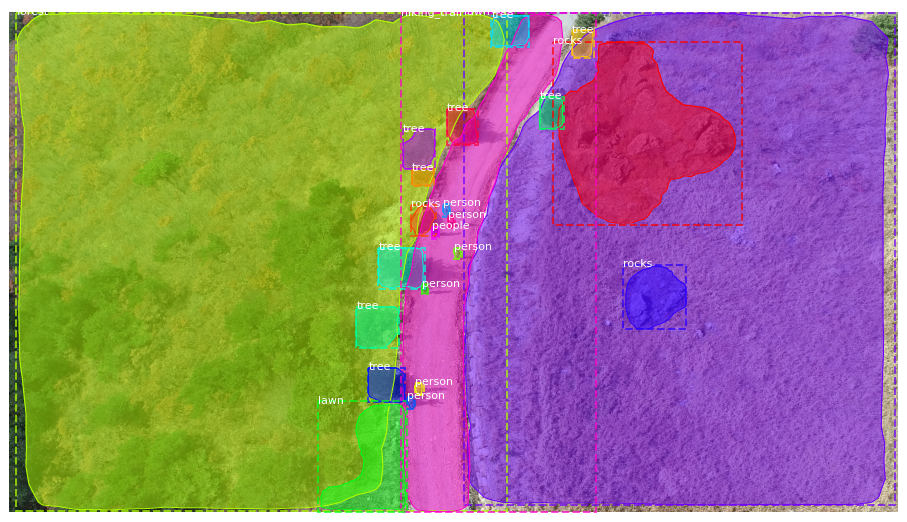

In [6]:
%matplotlib inline
image = skimage.io.imread(os.path.join(IMAGE_DIR, test_image))

# Run detection
results = model.detect([image], verbose=1)
r = results[0]

# Visualize results
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names)